In [2841]:
import plotly.graph_objects as go
import numpy as np
import math as mt
np.set_printoptions(precision=3)



In [2842]:
mu_n = 1500 #Si

mu_p = 450 #Ge

tau = 2.5e-3

n_d = 1e19 # 1e24 #Si

n_a = 1e19 # 1e27 #Ge

n_i = 1.45e10 #4.1965628744881365e+43 #1.54e10 #3.1692624012013003e17 #3.1692624012013003e13 #3.1692624012013003e13 #2e-20

k = 1.380649e-23 #J/K

q = 1.602176634e-19 #C

t = 300

i = 1 #A

v_r = 50 #V

v_f = 0.93

f = 100000 #Hz

m = 9.1e-31 #Kg

eps = 11.9*8.85e-14

kev = 8.617333262e-5

epsau = 6.9*8.85e-14

e_g = 1.11

hbar = 6.63e-34/(2*np.pi)

In [2843]:
ni2 = 2*((kev*t)/(2*np.pi*(hbar**2)))**(3/2)*(0.43*m*0.54*m)**(3/4)*np.exp(-e_g/(2*kev*t))#
n_v = 1/(np.sqrt(2))*((0.54*m*k*t)/(np.pi*(hbar**2)))
n_c = 1/(np.sqrt(2))*((0.43*m*k*t)/(np.pi*(hbar**2)))
ni3 = np.sqrt(n_c * n_v * np.exp(-e_g / (kev * t)))
print(n_v,n_c,ni2, ni3)

4.114409356382017e+16 3.2762889319338276e+16 6.192550194143134e+43 17428307.093720958


C:\Users\alvar\AppData\Local\Temp\ipykernel_10904\2054153900.py:13: RuntimeWarning:

divide by zero encountered in double_scalars



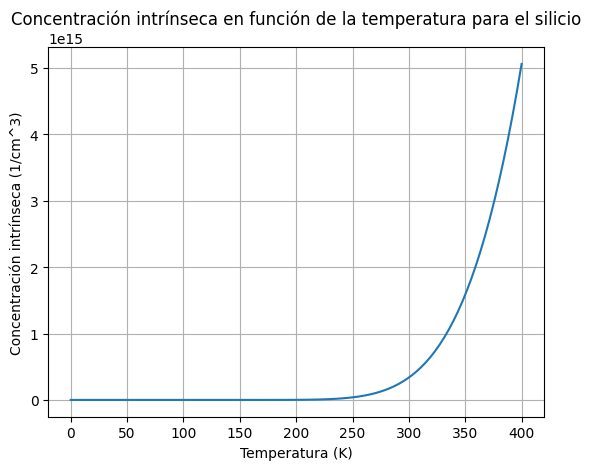

In [2844]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del silicio
Eg = 1.12  # Energía de la banda prohibida del silicio en electronvoltios (eV)
Nc = 2.8e19  # Densidad efectiva de estados en la banda de conducción a T = 300 K (1/cm^3)
Nv = 1.04e19  # Densidad efectiva de estados en la banda de valencia a T = 300 K (1/cm^3)
ni = np.zeros(100)  # Concentración intrínseca del silicio
T = np.linspace(0, 400, 100)  # Rango de temperatura (en Kelvin)

# Cálculo de la concentración intrínseca
for i in range(len(T)):
    ni[i] = np.sqrt(Nc * Nv * np.exp(-Eg / (2 * 8.617333262145e-5 * T[i])))

# Crear la gráfica
plt.plot(T, ni)
plt.xlabel('Temperatura (K)')
plt.ylabel('Concentración intrínseca (1/cm^3)')
plt.title('Concentración intrínseca en función de la temperatura para el silicio')
plt.grid(True)
plt.show()


# Ecuación del diodo ideal

In [2845]:
D_n = (k*t*mu_n)/q


D_p = (k*t*mu_p)/q


print(D_p, D_n)

11.633399903895992 38.777999679653306


In [2846]:
L_p = np.sqrt(D_p*tau)
L_n = np.sqrt(D_n*tau)

print(L_p, L_n)

0.1705388511739773 0.3113599190633458


In [2847]:
vbi = ((k*t)/q)*np.log((n_a*n_d)/(n_i**2))

print(vbi)


wab0 = np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(vbi))
wab = np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(vbi-v_f))

wab2 = np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(vbi+v_r))

print(wab0, wab, wab2)

1.0522644060188915
1.6633450684733407e-06 5.669828674631671e-07 1.1585837149389839e-05


In [2848]:
xpab = wab/(1+n_a/n_d)

xpab2 = wab2/(1+n_a/n_d)

xnab = (n_a/n_d)*xpab
xnab2 = (n_a/n_d)*xpab2

xpab0 = wab0/(1+n_a/n_d)

xnab0 = (n_a/n_d)*xpab0
print(xpab, xnab)

print(xpab2, xnab2)
print(xpab0, xnab0)

2.8349143373158354e-07 2.8349143373158354e-07
5.792918574694919e-06 5.792918574694919e-06
8.316725342366703e-07 8.316725342366703e-07


In [2849]:
i_s = i/(np.exp((v_f*q)/(k*t))-1)

print(i_s) 

2.356800491439374e-14


In [2850]:
j_s = q*(n_i**2)*((1/n_d)*np.sqrt(D_p/tau))+(1/n_a)*np.sqrt(D_n/tau)

j_sc = q*(n_i**2)*((1/n_d)*(D_p/(xnab))+(1/n_a)*(D_n/(xpab)))


print(j_s)
print(j_sc)

2.422436546587998e-16
5.990115726989994e-10


In [2851]:

area = i_s/j_sc


print(area)

3.934482402101529e-05


In [2852]:
l = np.sqrt(area)

print(l)

0.006272545258586445


In [2853]:
c0 = (eps/wab0)
c1 = (eps/wab)
c2 = (eps/wab2)

print(c0, c1, c2)

6.331518456158993e-07 1.8574635327379021e-06 9.089977585741084e-08


In [2854]:
A = (4*np.pi*q*(k**2)*m)/((2*np.pi*hbar)**3)

print(A)

phi = (np.log(j_sc/(A*(t**2)))*k*t)/(q)

print(phi)

#Bajas concentraciones

r_c_1 = (k/q*A*t)*np.exp((q*phi/(k*t)))

print(r_c_1)

#Altas concentraciones
r_c_2 = np.exp((4*np.sqrt(0.35*m*epsau)*phi)/(np.sqrt(n_d)*hbar))

print(r_c_2)

1198360.8993124703
-1.205731334706739
1.720627449942982e-16
0.0


In [2855]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_r, 1000)

w0_g = np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*te)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * te))))**2))))
w1_g = np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*te)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * te))))**2))-v_f))
w2_g = np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*te)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * te))))**2))+v_r))

# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=te, y=w0_g, mode='lines', name=f'En equilibrio'))
fig.add_trace(go.Scatter(x=te, y=w1_g, mode='lines', name=f'Voltaje directa = {v_f} V'))
fig.add_trace(go.Scatter(x=te, y=w2_g, mode='lines', name=f'Voltaje inversa = {v_r} V'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='T (K)', showline=True),
    yaxis=dict(title='W (cm)', showline=True),
    title='Ancho de la zona espacial de cargas en función de la temperatura',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y



# Mostrar el gráfico
fig.show()



In [2856]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_r, 1000)

c0_g = (eps/(np.sqrt(((2*eps)/q)*(1/n_d)*((((k*te)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * te))))**2)))))))
c_g =  (eps/(np.sqrt(((2*eps)/q)*(1/n_d)*((((k*te)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * te))))**2)))-v_f))))
c2_g = (eps/(np.sqrt(((2*eps)/q)*(1/n_d)*((((k*te)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * te))))**2)))+v_r))))


# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=te, y=c_g, mode='lines', name=f'Voltaje directo = {v_f} V'))
fig.add_trace(go.Scatter(x=te, y=c2_g, mode='lines', name=f'Voltaje inverso = {v_r} V'))
fig.add_trace(go.Scatter(x=te, y=c0_g, mode='lines', name=f'Equilibrio'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='T (K)', showline=True),
    yaxis=dict(title='Cj (F/cm^2)', showline=True),
    title='Capacidad de la unión frente a la temperatura',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y



# Mostrar el gráfico
fig.show()

In [2857]:
cd = (area*(q**2)*L_p*((n_i**2)/n_a))/(k*t)*(np.exp((q * v_f) / (k * t)))
cd2 = (area*(q**2)*L_p*((n_i**2)/n_a))/(k*t)*(np.exp((q * -v_r) / (k * t)))

print(cd, cd2)

3.6726164006953844e-06 0.0


In [2858]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_r, 1000)

cd_g = (area*(q**2)*L_p*(((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * te))))**2)/n_a))/(k*te)*(np.exp((q * v_f) / (k * te)))


# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=te, y=cd_g, mode='lines', name=f'Voltaje directo = {v_f} V'))
#fig.add_trace(go.Scatter(x=-vr_s, y=-i_g2, mode='lines', name=f'Voltaje inverso = {v_r} V'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='T (K)', showline=True),
    yaxis=dict(title='Cd (F)', showline=True),
    title='Variación de la capacidad de difusión frente a la temperatura',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y



# Mostrar el gráfico
fig.show()

In [2859]:
import numpy as np
import plotly.graph_objects as go

te = [250, 280, 310, 340]

v_f_g = np.linspace(0, v_f, 1000)


fig = go.Figure()

for g in te:
    g2 = (q / (k * g))* i_s * np.exp((q * v_f_g) / (k * g))
    fig.add_trace(go.Scatter(x=v_f_g, y=g2, mode='lines', name=f'Temperatura = {g} K'))

fig.update_layout(
    xaxis=dict(title='Voltaje (V)', showline=True),
    yaxis=dict(title='Conductancia (S)', range=[0, 1]),
    title='Variación de la conductancia respecto a la temperatura',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()


In [2860]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_r, 1000)

i_g1 = i_s * (np.exp((q * vf_s) / (k * t))-1)
i_g2 = i_s * (np.exp((q * (vr_s)) / (k * t))-1)

# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=vf_s, y=i_g1, mode='lines', name=f'Voltaje directo = {v_f} V'))
fig.add_trace(go.Scatter(x=-vr_s, y=-i_g2, mode='lines', name=f'Voltaje inverso = {v_r} V'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Voltaje (V)', showline=True),
    yaxis=dict(title='Corriente (A)'),
    title=' I-V ',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y



# Mostrar el gráfico
fig.show()


C:\Users\alvar\AppData\Local\Temp\ipykernel_10904\1888453030.py:9: RuntimeWarning:

overflow encountered in exp



In [2861]:
""" import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_r, 1000)

i_j1 = j_s2 * (np.exp((q * vr_s) / (k * t))-1)
#i_g2 = i_s * (np.exp((q * (vr_s)) / (k * t))-1)

# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=vr_s, y=i_j1, mode='lines', name=f'Voltaje directo = {v_r} V'))
#fig.add_trace(go.Scatter(x=-vr_s, y=-i_g2, mode='lines', name=f'Voltaje inverso = {v_r} V'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Voltaje (V)'),
    yaxis=dict(title='Corriente (A)'),
    title='Curvas I-V para diferentes voltajes',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y



# Mostrar el gráfico
fig.show()
 """

' import numpy as np\nimport plotly.graph_objects as go\n\nte = np.linspace(250, 340, 90)\nvf_s = np.linspace(0, v_f, 1000)\nvr_s = np.linspace(0, v_r, 1000)\n\ni_j1 = j_s2 * (np.exp((q * vr_s) / (k * t))-1)\n#i_g2 = i_s * (np.exp((q * (vr_s)) / (k * t))-1)\n\n# Crear la figura\nfig = go.Figure()\n\n# Agregar las curvas al gráfico\nfig.add_trace(go.Scatter(x=vr_s, y=i_j1, mode=\'lines\', name=f\'Voltaje directo = {v_r} V\'))\n#fig.add_trace(go.Scatter(x=-vr_s, y=-i_g2, mode=\'lines\', name=f\'Voltaje inverso = {v_r} V\'))\n\n# Configurar el diseño del gráfico\nfig.update_layout(\n    xaxis=dict(title=\'Voltaje (V)\'),\n    yaxis=dict(title=\'Corriente (A)\'),\n    title=\'Curvas I-V para diferentes voltajes\',\n    showlegend=True,\n    plot_bgcolor="white",\n    paper_bgcolor="white"\n)\n# Configurar las líneas de los ejes x e y\n\n\n\n# Mostrar el gráfico\nfig.show()\n '

In [2862]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, (q * v_f) / (k * t), 1000)
vr_s = np.linspace(0, (q * v_r) / (k * t), 1000)

i_g1 = (np.exp(vf_s)-1)
i_g2 = (np.exp(-vr_s)-1)

# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=vf_s, y=i_g1, mode='lines', name=f'Voltaje directo = {v_f} V'))
fig.add_trace(go.Scatter(x=-vr_s, y=i_g2, mode='lines', name=f'Voltaje inverso = {v_r} V'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='qV/kT', showline=True),
    yaxis=dict(title='J/Js', showline=True),
    title='',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y

# Mostrar el gráfico
fig.show()

In [2863]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_f, 1000)

i_t1 = 2*((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * 340)))*L_p)/(n_d*(np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*340)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * 340))))**2))-vf_s)))))*np.exp((q*vf_s)/(k*340))
i_t2 = 2*((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * 250)))*L_p)/(n_d*(np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*250)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * 250))))**2))-vf_s)))))*np.exp((q*vf_s)/(k*250))
i_t3 = 2*((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * 295)))*L_p)/(n_d*(np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*295)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * 295))))**2))-vf_s)))))*np.exp((q*vf_s)/(k*295))

#i_g2 = (np.exp(-vr_s)-1)

# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=vf_s, y=i_t1, mode='lines', name=f'Temperatura de 340 K'))
fig.add_trace(go.Scatter(x=vf_s, y=i_t2, mode='lines', name=f'Temperatura de 250 K'))
fig.add_trace(go.Scatter(x=vf_s, y=i_t3, mode='lines', name=f'Temperatura de 295 K'))
#fig.add_trace(go.Scatter(x=-vr_s, y=i_g2, mode='lines', name=f'Voltaje inverso = {v_r} V'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Voltaje (V)'),
    yaxis=dict(title='Idiff/Irec', range=[0, 1]),
    title='Directa',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y

# Mostrar el gráfico
fig.show()

In [2864]:
import numpy as np
import plotly.graph_objects as go

te = np.linspace(250, 340, 90)
vf_s = np.linspace(0, v_f, 1000)
vr_s = np.linspace(0, v_r, 1000)

i_tt1 = 2*((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * 340)))*L_p)/(n_d*(np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*340)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * 340))))**2))+vr_s)))))
i_tt2 = 2*((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * 250)))*L_p)/(n_d*(np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*250)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * 250))))**2))+vr_s)))))
i_tt3 = 2*((np.sqrt(n_c * n_v * np.exp(-e_g / (kev * 295)))*L_p)/(n_d*(np.sqrt(((2*eps)/q)*((n_a+n_d)/(n_a*n_d))*(((k*295)/q)*np.log((n_a*n_d)/((np.sqrt(n_c * n_v * np.exp(-e_g / ( kev * 295))))**2))+vr_s)))))
#i_g2 = (np.exp(-vr_s)-1)

# Crear la figura
fig = go.Figure()

# Agregar las curvas al gráfico
fig.add_trace(go.Scatter(x=-vr_s, y=i_tt1, mode='lines', name=f'Temperatura de 340 K'))
fig.add_trace(go.Scatter(x=-vr_s, y=i_tt2, mode='lines', name=f'Temperatura de 250 K'))
fig.add_trace(go.Scatter(x=-vr_s, y=i_tt3, mode='lines', name=f'Temperatura de 295 K'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Voltaje (V)'),
    yaxis=dict(title='Idiff/Irec', range=[0, 2e-6]),
    title='Inversa',
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white"
)
# Configurar las líneas de los ejes x e y

# Mostrar el gráfico
fig.show()